In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.decomposition import PCA
from copy import deepcopy

In [436]:
data = pd.read_csv("train.csv", index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [437]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [438]:
print(data.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [439]:
target = data['Survived']
data = data.drop(['Survived'], axis=1)

In [403]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [404]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [405]:
data['fam_members'] = data['SibSp'].astype(int) + data['Parch'].astype(int)
data = data.drop(['Parch', 'SibSp', 'Ticket'], axis=1)

In [406]:
data['Name'] = data['Name'].apply(lambda x: len(x.split()))

In [407]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

features = data.select_dtypes(include=['int64', 'float64']).columns
data2 = (data[features] - data[features].mean(numeric_only=True)) / data[features].std(numeric_only=True)

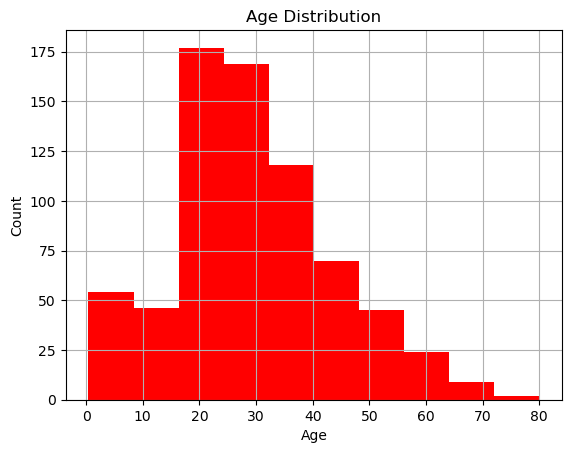

In [408]:
fig, ax = plt.subplots()
data['Age'].hist(ax=ax, color='red')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Age Distribution')
plt.show()

In [409]:
# Заповнення пропущених значень в стовпчику "Age" медіаною
median_age = data.Age.median()
data.Age.fillna(median_age, inplace=True)

# Рахуємо кількість входжень кожного значення в стовпчику "Cabin"
cabin_value_counts = data.Cabin.value_counts()

# Конвертуємо стовпчик "Cabin" до стрічкового типу
cabin_str = data.Cabin.astype(str)

# Обрізаємо кожну стрічку до першої літери та рахуємо кількість входжень кожної літери
cabin_letter_counts = cabin_str.str[0].value_counts()

In [410]:
cabin_value_counts

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [411]:
cabin_str

PassengerId
1       nan
2       C85
3       nan
4      C123
5       nan
       ... 
887     nan
888     B42
889     nan
890    C148
891     nan
Name: Cabin, Length: 891, dtype: object

In [412]:
cabin_letter_counts

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [413]:
data

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,fam_members
PassengerId,,,,,,,,
1,3,4,0,22.0,7.2500,NaN,0.0,1
2,1,7,1,38.0,71.2833,C85,1.0,1
3,3,3,1,26.0,7.9250,NaN,0.0,0
4,1,7,1,35.0,53.1000,C123,0.0,1
5,3,4,0,35.0,8.0500,NaN,0.0,0
...,...,...,...,...,...,...,...,...
887,2,3,0,27.0,13.0000,NaN,0.0,0
888,1,4,1,19.0,30.0000,B42,0.0,0
889,3,5,1,28.0,23.4500,NaN,0.0,3


In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Name         891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Cabin        204 non-null    object 
 6   Embarked     889 non-null    float64
 7   fam_members  891 non-null    int32  
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 59.2+ KB


In [415]:
data.drop(['Cabin'], axis=1, inplace=True)

In [416]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Name         891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     889 non-null    float64
 6   fam_members  891 non-null    int32  
dtypes: float64(3), int32(1), int64(3)
memory usage: 52.2 KB


In [417]:
data

,Pclass,Name,Sex,Age,Fare,Embarked,fam_members
PassengerId,,,,,,,
1,3,4,0,22.0,7.2500,0.0,1
2,1,7,1,38.0,71.2833,1.0,1
3,3,3,1,26.0,7.9250,0.0,0
4,1,7,1,35.0,53.1000,0.0,1
5,3,4,0,35.0,8.0500,0.0,0
...,...,...,...,...,...,...,...
887,2,3,0,27.0,13.0000,0.0,0
888,1,4,1,19.0,30.0000,0.0,0
889,3,5,1,28.0,23.4500,0.0,3


In [418]:
data2.fillna(data2.mean(), inplace=True)

In [419]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(data2)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [420]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data2)

In [421]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_ratio_)
loading_matrix = pd.DataFrame(loadings, columns=['A', 'B'], index=features)

In [422]:
loading_matrix

,A,B
Pclass,-0.331148,0.171096
Name,0.239182,0.209430
Sex,0.211687,0.290486
Age,0.113297,-0.181990
Fare,0.310150,-0.111162
Embarked,0.003713,0.045678


In [423]:
from sklearn.metrics import accuracy_score

max(accuracy_score(target, labels), 1 - accuracy_score(target, labels))

0.7081930415263749

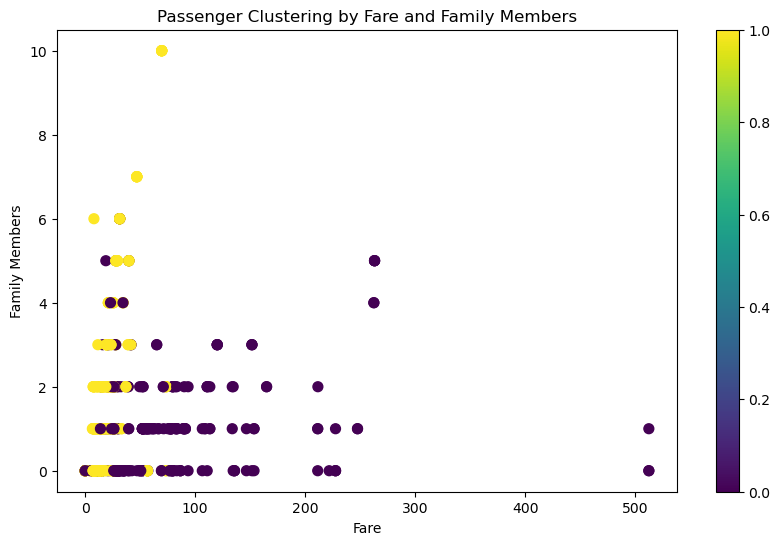

In [424]:
plt.figure(figsize=(10, 6))
plt.scatter(data.Fare, data.fam_members, c=labels, cmap='viridis', s=50)
plt.xlabel('Fare')
plt.ylabel('Family Members')
plt.title('Passenger Clustering by Fare and Family Members')
plt.colorbar()
plt.show()

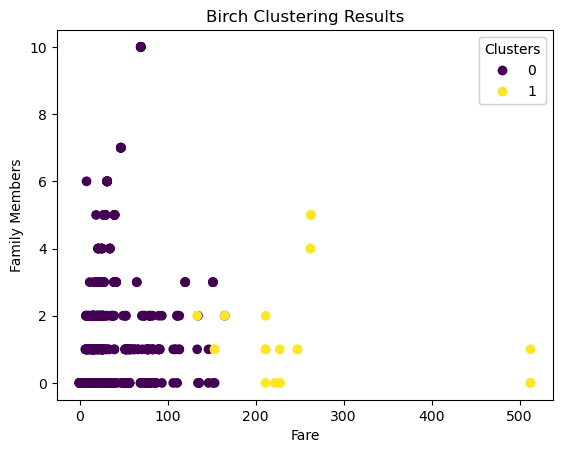

Accuracy: 0.6285072951739619


In [425]:
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

birch = Birch(n_clusters=2)
birch.fit(data2)
labels = birch.predict(data2)

fig, ax = plt.subplots()
scatter = ax.scatter(data.Fare, data.fam_members, c=labels)

# add a colorbar to show cluster assignments
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('Fare')
ax.set_ylabel('Family Members')
ax.set_title('Birch Clustering Results')

plt.show()

# calculate accuracy score
accuracy = max(accuracy_score(target, labels), 1 - accuracy_score(target, labels))
print(f"Accuracy: {accuracy}")

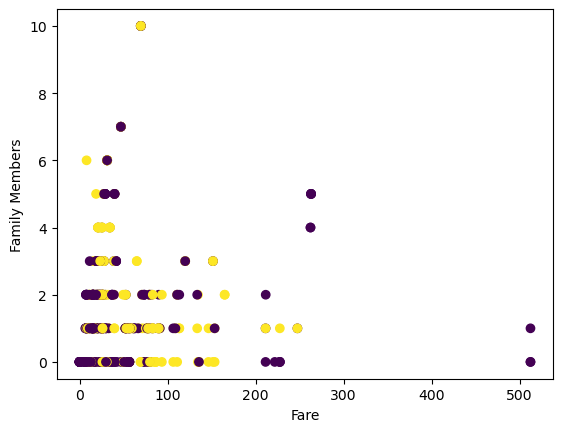

Accuracy: 0.7418630751964085


In [426]:
agg_clust = AgglomerativeClustering(n_clusters=2).fit_predict(data2)
plt.scatter(data.Fare, data.fam_members, c=agg_clust, cmap='viridis')
plt.xlabel('Fare')
plt.ylabel('Family Members')
plt.show()

accuracy = max(accuracy_score(target, agg_clust), 1 - accuracy_score(target, agg_clust))
print(f"Accuracy: {accuracy}")

In [428]:
data2 = data2.iloc[:, [0, 1, 2, 3, 5]]

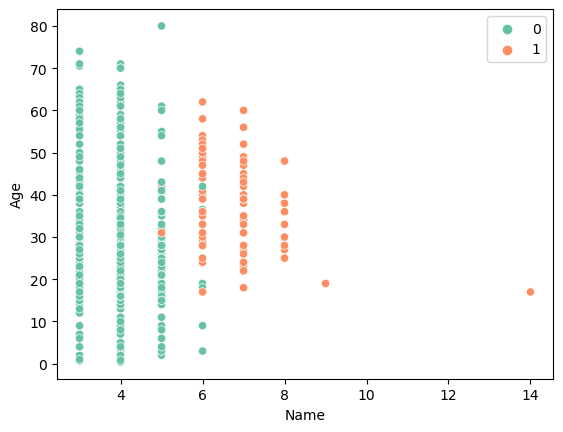

0.6778900112233446

In [429]:
import seaborn as sns
birch = Birch(n_clusters=2)
birch.fit(data2)
labels = birch.predict(data2)

sns.scatterplot(data=data, x='Name', y='Age', hue=labels, palette='Set2')
plt.xlabel('Name')
plt.ylabel('Age')
plt.show()

max(accuracy_score(target, labels), 1 - accuracy_score(target, labels))

In [431]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data2)

loadings = np.multiply(pca.components_.T, np.sqrt(pca.explained_variance_ratio_))
loading_matrix = pd.DataFrame(loadings, columns=['A', 'B'], index=['Pclass', 'Name', 'Sex', 'Age', 'Embarked'])
loading_matrix

,A,B
Pclass,-0.291562,-0.234543
Name,0.356902,-0.064542
Sex,0.303656,-0.264579
Age,0.112294,0.246643
Embarked,-0.033241,-0.219489


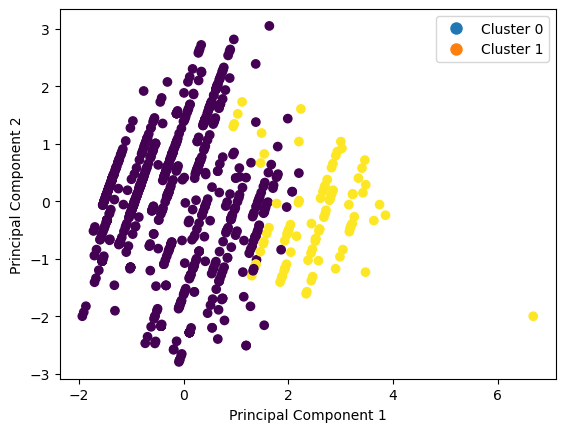

In [432]:
import matplotlib.pyplot as plt

# Побудова графіку
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels)

# Додавання підписів до осей
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Додавання легенди
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), markerfacecolor='C{}'.format(i), markersize=10) for i in range(len(np.unique(labels)))]
plt.legend(handles=legend_elements)

# Відображення графіку
plt.show()


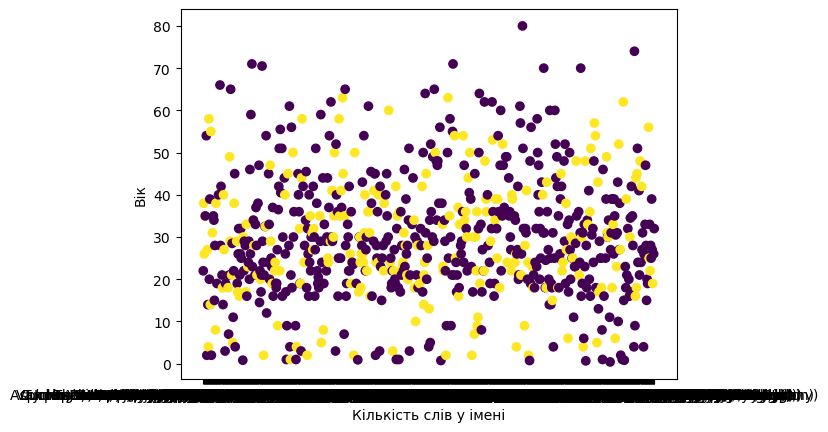

Accuracy: 0.75
Error: 0.25
Max error: 0.75


In [452]:
#Застосовуємо агломеративний алгоритм кластеризації до даних
agg_clust = AgglomerativeClustering().fit(data2)

#Отримуємо мітки кластерів для кожного елемента
labels = agg_clust.labels_

#Візуалізуємо дані на графіку з мітками кластерів
plt.scatter(data.Name, data.Age, c=labels)
plt.xlabel('Кількість слів у імені')
plt.ylabel('Вік')
plt.show()

#Обчислюємо точність кластеризації
accuracy = accuracy_score(target, labels)
error = 1 - accuracy
max_error = max(accuracy, error)
print("Accuracy: {:.2f}".format(accuracy))
print("Error: {:.2f}".format(error))
print("Max error: {:.2f}".format(max_error))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


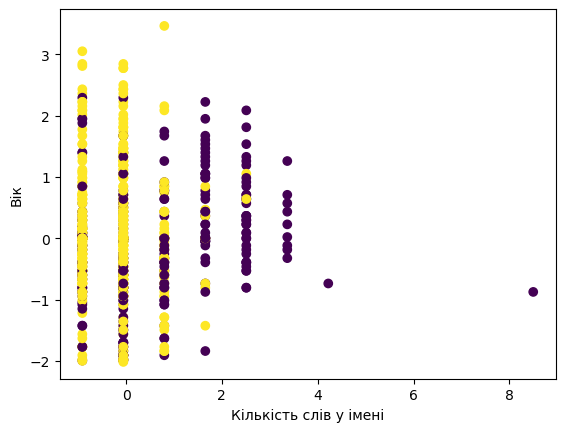

Accuracy: 0.21
Error: 0.79
Max error: 0.79


In [447]:
#Застосовуємо алгоритм k-means кластеризації до даних
kmeans = KMeans(n_clusters=2, random_state=0).fit(data2)

#Отримуємо мітки кластерів для кожного елемента
labels = kmeans.labels_

#Візуалізуємо дані на графіку з мітками кластерів
plt.scatter(data2.Name, data2.Age, c=labels)
plt.xlabel('Кількість слів у імені')
plt.ylabel('Вік')
plt.show()

#Обчислюємо точність кластеризації
accuracy = accuracy_score(target, labels)
error = 1 - accuracy
max_error = max(accuracy, error)
print("Accuracy: {:.2f}".format(accuracy))
print("Error: {:.2f}".format(error))
print("Max error: {:.2f}".format(max_error))